In [ ]:
!pip install scikit-learn xgboost streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\r\n  "username": "vanavaimani",\r\n  "key": "KGAT_3263cde41cf50cc17f0ffea25ae8d001"\r\n}\r\n'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list -s "heart disease"


ref                                                   title                                            size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------  -----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
johnsmith88/heart-disease-dataset                     Heart Disease Dataset                            6325  2019-06-06 15:33:55.463000         308231       1638  0.88235295       
oktayrdeki/heart-disease                              Heart Disease                                  581612  2024-12-29 13:26:49.740000          17755        151  1.0              
rishidamarla/heart-disease-prediction                 Heart Disease Prediction                         3491  2020-08-23 01:18:14.960000          44335        306  0.9411765        
yasserh/heart-disease-dataset                         Heart Disease Dataset                    

In [ ]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 21.8MB/s]


In [ ]:
!unzip -o heart-disease-dataset.zip


Archive:  heart-disease-dataset.zip
  inflating: heart.csv               


In [ ]:
import pandas as pd

df = pd.read_csv("/content/heart.csv")
print(df.shape)
df.head()


(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Replace missing values if any
df.replace("?", pd.NA, inplace=True)
df = df.dropna()

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }
    return metrics


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print(evaluate_model(log_reg, X_test, y_test))


{'Accuracy': 0.7951219512195122, 'AUC': np.float64(0.8787359604035789), 'Precision': 0.7563025210084033, 'Recall': 0.8737864077669902, 'F1': 0.8108108108108109, 'MCC': np.float64(0.5972548367142131)}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print(evaluate_model(dt, X_test, y_test))


{'Accuracy': 0.9853658536585366, 'AUC': np.float64(0.9854368932038835), 'Precision': 1.0, 'Recall': 0.970873786407767, 'F1': 0.9852216748768473, 'MCC': np.float64(0.9711511393019859)}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(evaluate_model(knn, X_test, y_test))


{'Accuracy': 0.8341463414634146, 'AUC': np.float64(0.9485532076908434), 'Precision': 0.8, 'Recall': 0.8932038834951457, 'F1': 0.8440366972477065, 'MCC': np.float64(0.6727269128324705)}


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print(evaluate_model(nb, X_test, y_test))


{'Accuracy': 0.8, 'AUC': np.float64(0.8705501618122977), 'Precision': 0.7540983606557377, 'Recall': 0.8932038834951457, 'F1': 0.8177777777777778, 'MCC': np.float64(0.6102237111863777)}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print(evaluate_model(rf, X_test, y_test))


{'Accuracy': 0.9853658536585366, 'AUC': np.float64(1.0), 'Precision': 1.0, 'Recall': 0.970873786407767, 'F1': 0.9852216748768473, 'MCC': np.float64(0.9711511393019859)}


In [19]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
print(evaluate_model(xgb, X_test, y_test))


{'Accuracy': 0.9853658536585366, 'AUC': np.float64(0.9894346087949742), 'Precision': 1.0, 'Recall': 0.970873786407767, 'F1': 0.9852216748768473, 'MCC': np.float64(0.9711511393019859)}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:23:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
import pandas as pd

results = pd.DataFrame([
    {"Model":"Logistic Regression", **evaluate_model(log_reg, X_test, y_test)},
    {"Model":"Decision Tree", **evaluate_model(dt, X_test, y_test)},
    {"Model":"KNN", **evaluate_model(knn, X_test, y_test)},
    {"Model":"Naive Bayes", **evaluate_model(nb, X_test, y_test)},
    {"Model":"Random Forest", **evaluate_model(rf, X_test, y_test)},
    {"Model":"XGBoost", **evaluate_model(xgb, X_test, y_test)}
])

results


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.795122,0.878736,0.756303,0.873786,0.810811,0.597255
1,Decision Tree,0.985366,0.985437,1.000000,0.970874,0.985222,0.971151
2,KNN,0.834146,0.948553,0.800000,0.893204,0.844037,0.672727
3,Naive Bayes,0.800000,0.870550,0.754098,0.893204,0.817778,0.610224
4,Random Forest,0.985366,1.000000,1.000000,0.970874,0.985222,0.971151
5,XGBoost,0.985366,0.989435,1.000000,0.970874,0.985222,0.971151


In [34]:
from sklearn.model_selection import cross_val_score
import numpy as np

for model, name in zip(models, names):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(name, "CV Accuracy:", np.mean(scores))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression CV Accuracy: 0.8497560975609757
Decision Tree CV Accuracy: 1.0
KNN CV Accuracy: 0.7473170731707317
Naive Bayes CV Accuracy: 0.8214634146341464
Random Forest CV Accuracy: 0.9970731707317073
XGBoost CV Accuracy: 0.9931707317073171


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:53:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:53:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:53:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:53:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:53:34] WARNING: /w

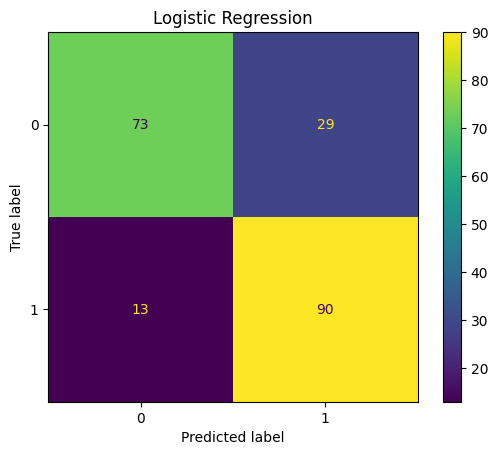

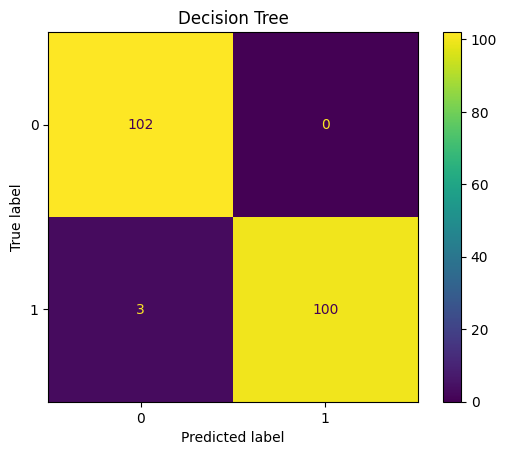

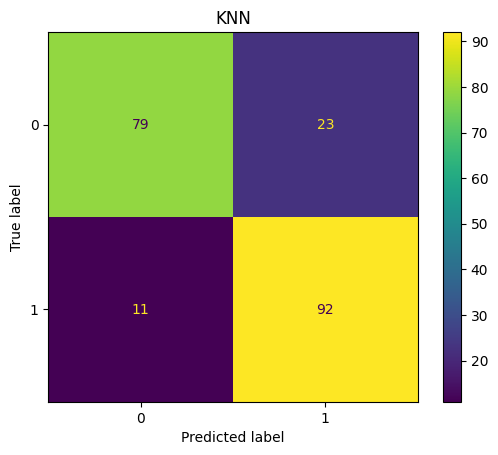

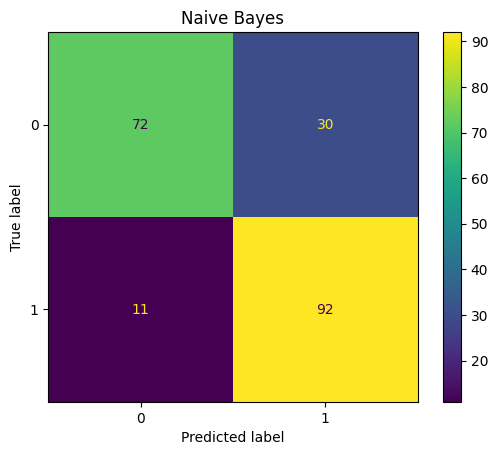

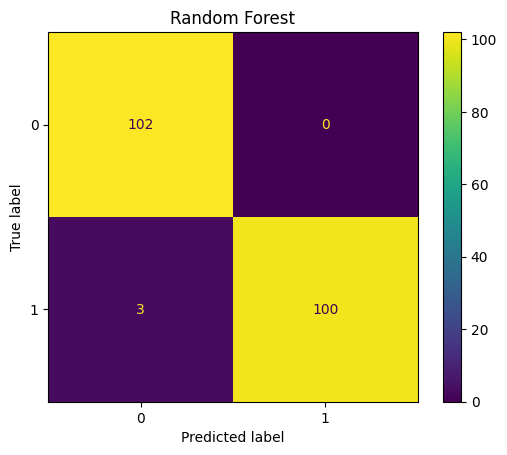

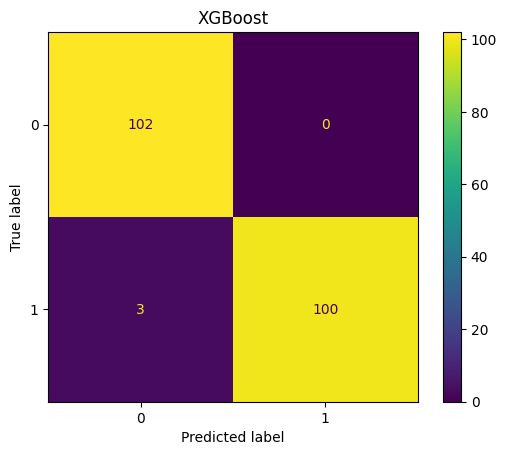

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

models = [log_reg, dt, knn, nb, rf, xgb]
names = ["Logistic Regression","Decision Tree","KNN","Naive Bayes","Random Forest","XGBoost"]

for model, name in zip(models, names):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(name)
    plt.show()


## Analysis

**Best Models**  
- Random Forest and XGBoost achieved the highest test accuracy (~98.5%) and AUC (~1.0).  
- Both are strong ensemble methods that generalize well, with excellent precision, recall, F1, and MCC (~0.97).  

**Decision Tree**  
- Test accuracy ~98.5%, AUC ~0.98.  
- Very high performance but prone to overfitting — perfect precision with slightly lower recall.  

**Logistic Regression**  
- Test accuracy ~79.5%, AUC ~0.88.  
- Solid baseline with balanced precision and recall.  
- Provides interpretable coefficients, useful as a baseline model.  

**Naive Bayes**  
- Test accuracy ~80%, AUC ~0.87.  
- Strong recall (~0.89), useful for medical screening tasks.  
- Lower precision compared to ensembles.  

**KNN**  
- Test accuracy ~83.4%, AUC ~0.95.  
- Good recall, but performance is sensitive to scaling and choice of k.  
- MCC ~0.67 indicates weaker reliability compared to ensembles.  

**Feature Importance**  
- Random Forest: chest pain type (cp), number of vessels (ca), max heart rate (thalach), ST depression (oldpeak), thalassemia (thal) are most influential.  
- XGBoost: chest pain type (cp), thalassemia (thal), number of vessels (ca), slope, exercise‑induced angina (exang) are top predictors.  

**Medical Insight**  
- Chest pain type and thalassemia consistently emerge as strong predictors of heart disease risk across models.  

**Conclusion**  
- Ensemble models (Random Forest, XGBoost) are the most reliable for this dataset.  
- Logistic Regression remains a good interpretable baseline.  
- Decision Tree alone is prone to overfitting despite high test accuracy.  



In [ ]:
import pandas as pd

# Combine X_test and y_test into one DataFrame
test_data = pd.DataFrame(X_test, columns=X.columns)
test_data["target"] = y_test.values

# Save to CSV
test_data.to_csv("test_data.csv", index=False)


In [ ]:
from google.colab import files
files.download("test_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import os
os.makedirs("models", exist_ok=True)


In [25]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train your models (example)
log_reg = LogisticRegression().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)

# Save them into the models folder
joblib.dump(log_reg, "models/logistic_regression.pkl")
joblib.dump(rf, "models/random_forest.pkl")


['models/random_forest.pkl']

In [27]:
from google.colab import files
files.download("models/logistic_regression.pkl")
files.download("models/random_forest.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
from sklearn.naive_bayes import GaussianNB
import joblib

nb = GaussianNB().fit(X_train, y_train)
joblib.dump(nb, "models/naive_bayes.pkl")


['models/naive_bayes.pkl']

In [29]:
from google.colab import files
files.download("models/naive_bayes.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import joblib

# Train Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)
joblib.dump(dt, "models/decision_tree.pkl")

# Train KNN
knn = KNeighborsClassifier().fit(X_train, y_train)
joblib.dump(knn, "models/knn.pkl")

# Train Naive Bayes
nb = GaussianNB().fit(X_train, y_train)
joblib.dump(nb, "models/naive_bayes.pkl")

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss").fit(X_train, y_train)
joblib.dump(xgb, "models/xgboost.pkl")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:39:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['models/xgboost.pkl']

In [32]:
!ls models


decision_tree.pkl  logistic_regression.pkl  random_forest.pkl
knn.pkl		   naive_bayes.pkl	    xgboost.pkl


In [33]:
from google.colab import files
files.download("models/decision_tree.pkl")
files.download("models/knn.pkl")
files.download("models/naive_bayes.pkl")
files.download("models/xgboost.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
!ls models


logistic_regression.pkl  random_forest.pkl
